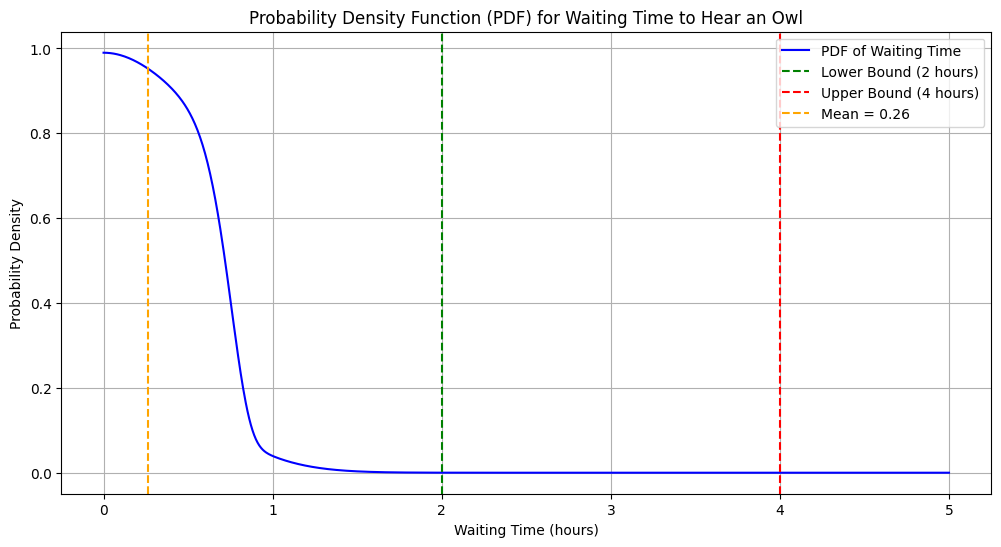

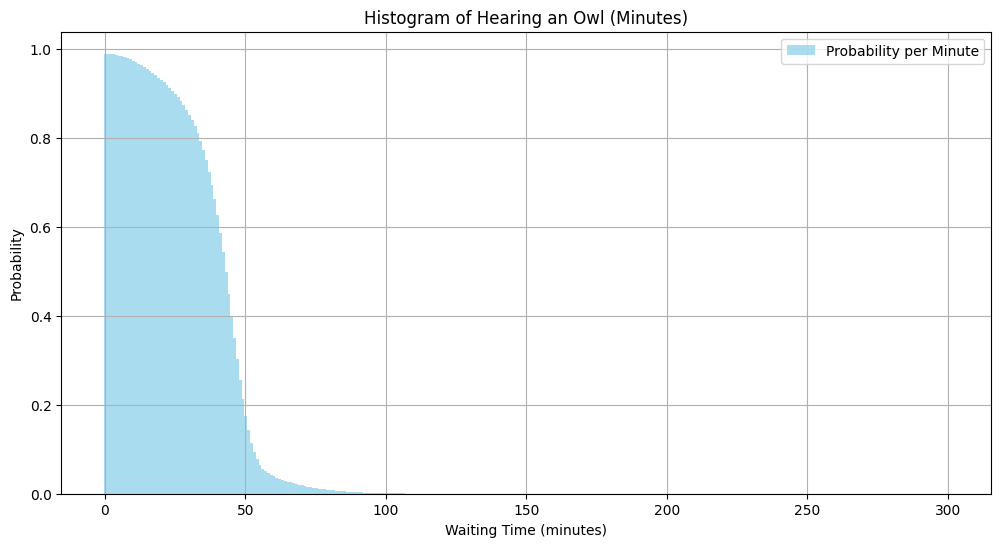

Probability of waiting between 2 and 4 hours: 0.0000
Mean of waiting time: 0.2611 hours
Variance of waiting time: 0.0512 hours^2
Quartiles (Q1, Median, Q3): [0.6878016033819061, 0.6900584709840405, 0.6900585751707247]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
xi5 = 0.29
xi6 = 2
xi7 = 0.70
xi8 = 8

# Probability density function for ξ₄ = 1
def pdf(y):
    return xi5 * np.exp(-xi6 * y**2) + xi7 * np.exp(-xi8 * y**8)

# Define the range of y (in hours)
y_hours = np.linspace(0, 5, 1000)  # Fine-grained for PDF plotting
pdf_values = pdf(y_hours)

# Calculate the probability between 2 and 4 hours
prob_2_to_4, _ = quad(pdf, 2, 4)  # Integrate the PDF between 2 and 4 hours

# Convert to minutes for histogram (1 hour = 60 minutes)
y_minutes = np.linspace(0, 300, 300)  # Range in minutes
pdf_values_minutes = pdf(y_minutes / 60)  # Convert minutes to hours for PDF calculation

# Compute statistics: mean, variance, and quartiles
mean = quad(lambda y: y * pdf(y), 0, np.inf)[0]  # Expectation E[Y]
variance = quad(lambda y: (y - mean)**2 * pdf(y), 0, np.inf)[0]  # Variance Var[Y]
quartiles = [
    quad(pdf, 0, q)[0] for q in np.percentile(y_hours, [25, 50, 75])
]  # Quartiles

# Plot PDF
plt.figure(figsize=(12, 6))
plt.plot(y_hours, pdf_values, color="blue", label="PDF of Waiting Time")
plt.axvline(2, color="green", linestyle="--", label="Lower Bound (2 hours)")
plt.axvline(4, color="red", linestyle="--", label="Upper Bound (4 hours)")
plt.axvline(mean, color="orange", linestyle="--", label=f"Mean = {mean:.2f}")
plt.title("Probability Density Function (PDF) for Waiting Time to Hear an Owl")
plt.xlabel("Waiting Time (hours)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Plot Histogram
plt.figure(figsize=(12, 6))
plt.bar(y_minutes, pdf_values_minutes, width=1, color="skyblue", alpha=0.7, label="Probability per Minute")
plt.title("Histogram of Hearing an Owl (Minutes)")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

# Display numerical results
print(f"Probability of waiting between 2 and 4 hours: {prob_2_to_4:.4f}")
print(f"Mean of waiting time: {mean:.4f} hours")
print(f"Variance of waiting time: {variance:.4f} hours^2")
print(f"Quartiles (Q1, Median, Q3): {quartiles}")
